Hypothesis: Stocks follow a random walk. The price movement of a stock today has no statistically significant predicitve power in determing its price tomorrow

In [203]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3

Tesla Stock Analysis

In [159]:
tesla = pd.read_csv('TSLA.csv')

In [160]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [161]:
tesla.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [172]:
tesla['Change in price'] = tesla['Close'] - tesla['Close'].shift(-1)

In [173]:
tesla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Change in price
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,0.059999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.870001
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2.759998
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.090000
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,0.310001
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,-1.659999
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,0.059999
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,0.350001
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,-1.090000
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100,-1.700001


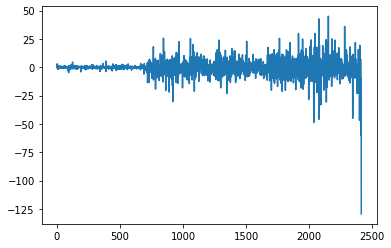

In [174]:
plt.plot(tesla['Change in price'])

In [175]:
tesla_auto_corr_close = pd.Series(tesla['Change in price'])

In [200]:
print(f'Auto correlation in price change: {tesla_auto_corr_close.autocorr(lag=1)}')
print(f'Auto correlation in price change: {tesla_auto_corr_close.autocorr(lag=10)}')
print(f'Auto correlation in price change: {tesla_auto_corr_close.autocorr(lag=30)}')
print(f'Auto correlation in price change: {tesla_auto_corr_close.autocorr(lag=90)}')

Auto correlation in price change: 0.03433701804019132
Auto correlation in price change: 0.012212363115550665
Auto correlation in price change: 0.039109241000423935
Auto correlation in price change: -0.0027302116259761773


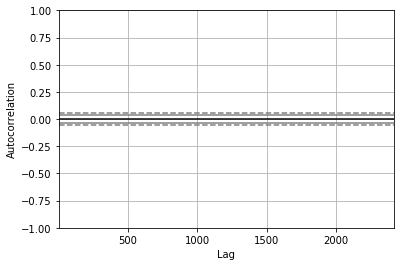

In [169]:
autocorrelation_plot(tesla_auto_corr_close, ax=None);

Tesla stock price shows extremely minimal autocorrlation. 

AMD Stock Analysis

In [103]:
amd = pd.read_csv('AMD.csv')

In [104]:
amd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,6.434732,6.563961,6.300887,6.433221,6.433221,3.107491e+07
std,3.872391,3.954999,3.792914,3.879124,3.879124,2.791149e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,3.480000,3.550000,3.405000,3.465000,3.465000,1.421670e+07
50%,5.580000,5.720000,5.450000,5.600000,5.600000,2.228020e+07
75%,8.555000,8.710000,8.375000,8.565000,8.565000,3.776905e+07
max,25.510000,27.299999,24.629999,25.260000,25.260000,3.250584e+08


In [105]:
amd.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [116]:
amd.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,4.43,4.43,4.25,4.26,4.26,8274300
1,2009-05-26,4.26,4.57,4.23,4.53,4.53,16094300
2,2009-05-27,4.57,4.80,4.55,4.71,4.71,21512600
3,2009-05-28,4.75,4.84,4.54,4.70,4.70,18383900
4,2009-05-29,4.71,4.78,4.38,4.54,4.54,24539700
5,2009-06-01,4.69,4.90,4.64,4.73,4.73,26633200
6,2009-06-02,4.68,4.70,4.55,4.56,4.56,24950700
7,2009-06-03,4.55,4.60,4.34,4.48,4.48,19087100
8,2009-06-04,4.57,4.74,4.54,4.65,4.65,19728300
9,2009-06-05,4.84,4.87,4.61,4.63,4.63,18775200


In [177]:
amd['Change in price']= amd['Close'] - amd['Close'].shift(-1)

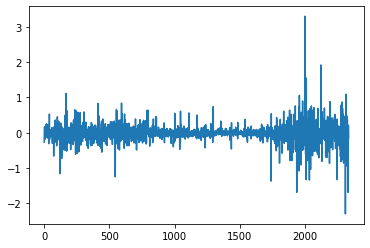

In [179]:
plt.plot(amd['Change in price']);

In [195]:
amd_auto_corr = pd.Series(amd['Change in price'])


In [201]:
print(f'Amd auto correlation for change in price at 1 day lag: {amd_auto_corr.autocorr(lag=1)}')
print(f'Amd auto correlation for change in price at 10 day lag: {amd_auto_corr.autocorr(lag=10)}')
print(f'Amd auto correlation for change in price at 30 day lag: {amd_auto_corr.autocorr(lag=30)}')
print(f'Amd auto correlation for change in price at 30 day lag: {amd_auto_corr.autocorr(lag=90)}')

Amd auto correlation for change in price at 1 day lag: 0.023777529569659586
Amd auto correlation for change in price at 10 day lag: 0.05096157924621025
Amd auto correlation for change in price at 30 day lag: -0.029730562060656947
Amd auto correlation for change in price at 30 day lag: -0.03312900433290952


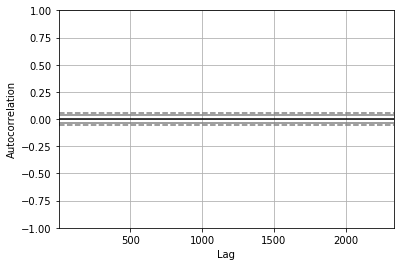

In [197]:
autocorrelation_plot(amd_auto_corr, ax=None);

Google Stock analysis

In [143]:
google = pd.read_csv('GOOGL.csv')

In [144]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07


In [145]:
google.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [146]:
google.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
1,2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2,2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
3,2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
4,2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100
5,2009-06-01,209.574570,215.015015,209.474472,213.493500,213.493500,6638100
6,2009-06-02,213.338333,215.195190,211.911911,214.414413,214.414413,5241900
7,2009-06-03,213.213211,216.446442,212.212219,216.041046,216.041046,7058500
8,2009-06-04,217.867874,220.840836,217.467468,220.360367,220.360367,7268900
9,2009-06-05,222.757751,223.893890,219.949951,222.382385,222.382385,7354200


In [188]:
google['Change in price'] = google['Close'] - google['Close'].shift(-1)

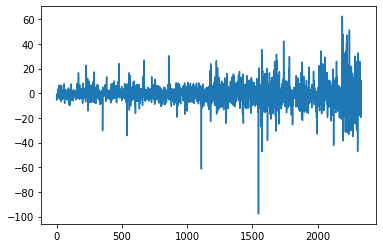

In [189]:
plt.plot(google['Change in price'])

In [198]:
google_auto_corr = pd.Series(google['Change in price'])

In [202]:
print(f'Google auto correlation for change in price at 1 day lag: {google_auto_corr.autocorr(lag=1)}')
print(f'Google auto correlation for change in price at 10 day lag: {google_auto_corr.autocorr(lag=10)}')
print(f'Google auto correlation for change in price at 30 day lag: {google_auto_corr.autocorr(lag=30)}')
print(f'Google auto correlation for change in price at 30 day lag: {google_auto_corr.autocorr(lag=90)}')

Google auto correlation for change in price at 1 day lag: 0.054036428294845625
Google auto correlation for change in price at 10 day lag: -0.0022905181848053065
Google auto correlation for change in price at 30 day lag: 0.0036033938477389965
Google auto correlation for change in price at 30 day lag: 0.009940762169914592
